# Objective: 

* Explore the dataset and extract actionable insights that will enable growth in the market.
* Perform univariate and multivariate analysis.
* Building customer profiles (characteristics of a customer) for the different products.
* Generate set recommendations that will help the company in targeting new customers.


# Data:
**CardioGoodFitness.csv** - it contains information about customers purchasing product.
* Product - the model no. of the treadmill
* Age - in no of years, of the customer
* Gender - of the customer
* Education - in no. of years, of the customer
* Marital Status - of the customer
* Usage - Avg. # times the customer wants to use the treadmill every week
* Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
* Income - of the customer
* Miles- expected to run

# <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#00b3e5;">Contents:

- <a href = #link1> 1.1 Import the libraries  </a>
- <a href = #link2> 1.2 Load dataset and check shape and variables  </a>
- <a href = #link3> 1.3 Check Statistical summary for all the datasets  </a>
- <a href = #link4> 1.4 Data Pre Processing  </a>
- <a href = #link5> 1.5 EDA  </a>
- <a href = #link6> 1.6 Customer profiling  </a>
- <a href = #link7> 1.7 Customer segmentation  </a>
- <a href = #link8> 1.8 Conclusion and Business Recommendations  </a>

<a id = "link1"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.1 Import the libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


<a id = "link2"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.2 Load dataset and check shape and variables

In [2]:
dfcard=pd.read_csv('CardioGoodFitness.csv')

In [3]:
dfcard.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


##### Check data shape

In [4]:
print("(Rows,column):",dfcard.shape)

(Rows,column): (180, 9)


##### Check data information

In [5]:
dfcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


* Product,Gender and MaritalStatus are object data type and can be assigned to categorical data type.

<a id = "link3"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.3 Check Statistical summary for all the datasets

In [6]:
dfcard.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


##### Observation:
* Mean for Age, Income and Miles is greater than median showing right skewness.
* Education, Fitness and usage mean and median are approximately same


<a id = "link4"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.4 Data Pre processing

##### Fix data types

In [7]:
dfcard["Product"]=dfcard["Product"].astype('category')
dfcard["Gender"]=dfcard["Gender"].astype('category')
dfcard["MaritalStatus"]=dfcard["MaritalStatus"].astype('category')

In [8]:
dfcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.4 KB


##### Check missing values

In [9]:
dfcard.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

<a id = "link5"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.5 EDA

## Univariate analysis

In [10]:
# Lets have common code for box plot and histogram
def histogram_boxplot(feature,figsize=(15,10),bins=None):
    f2,(ax_box2,ax_hist2)=plt.subplots(nrows=2,
                                     sharex=True,
                                     gridspec_kw={"height_ratios":(0.25,0.75)},
                                     figsize=figsize,
                                     )
    sns.boxplot(feature,ax=ax_box2,showmeans=True,color='violet')
    sns.distplot(feature,kde=False,ax=ax_hist2,bins=bins,palette='winter')if bins else sns.distplot(feature,kde=False,ax=ax_hist2)
    ax_hist2.axvline(np.mean(feature),color='green',linestyle='--')
    ax_hist2.axvline(np.median(feature),color='black',linestyle='-')
    print("Mean:",np.mean(feature),"\nMedian:",np.median(feature))

### Observations on Age

Mean: 28.788888888888888 
Median: 26.0
Q3: 33.0


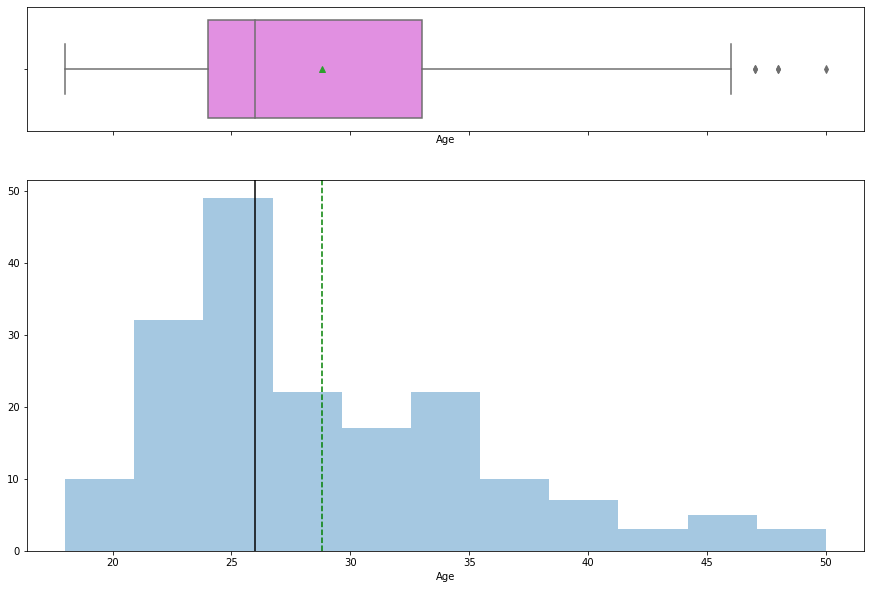

In [11]:
histogram_boxplot(dfcard['Age'])
print("Q3:",dfcard['Age'].quantile(0.75))

#### observation:
* Age is right skewed
* 75 % of the customer are below 33-year-old.
* There are few outliers on age.



### Observations on Education

Mean: 15.572222222222223 
Median: 16.0
Q3: 16.0


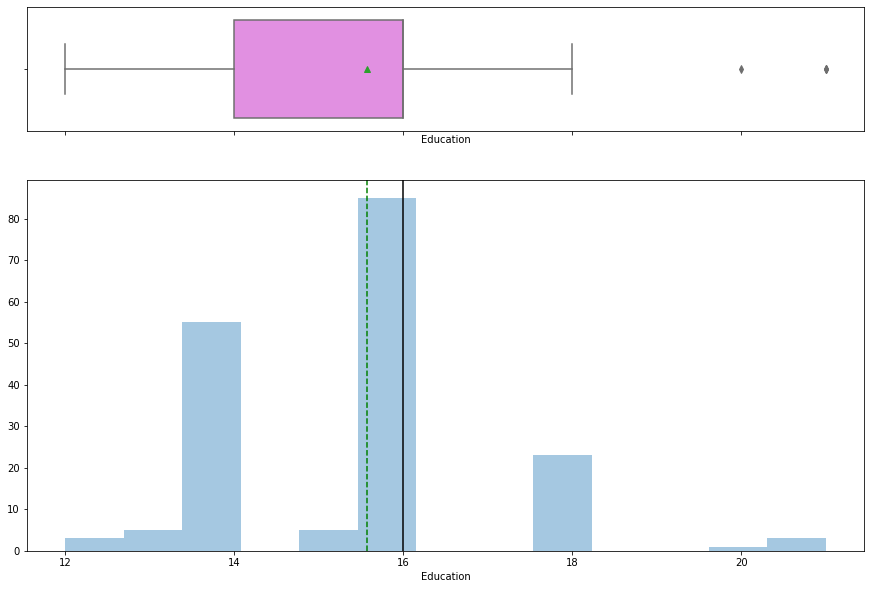

In [12]:
histogram_boxplot(dfcard['Education'])
print("Q3:",dfcard['Education'].quantile(0.75))

#### Observation
* There are some outliers. Few customers have 18 years of education.
* Majority customers have 15.5 year of education.

### Observations on Usage

Mean: 3.4555555555555557 
Median: 3.0
Q3: 4.0


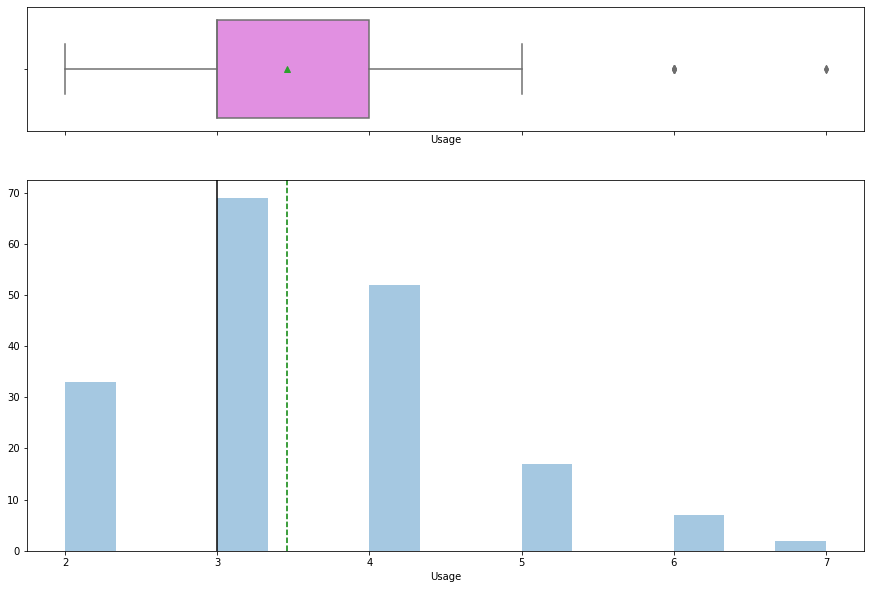

In [13]:
histogram_boxplot(dfcard['Usage'])
print("Q3:",dfcard['Usage'].quantile(0.75))

#### Observation:
* Customer are using 3 to 4 times treadmill in a week.
* There are customers who are using treadmill 6-7 times in a week. Those customer highlighted as outlier in the boxplot.


### Observations on Income

Mean: 53719.57777777778 
Median: 50596.5
Q3: 58668.0


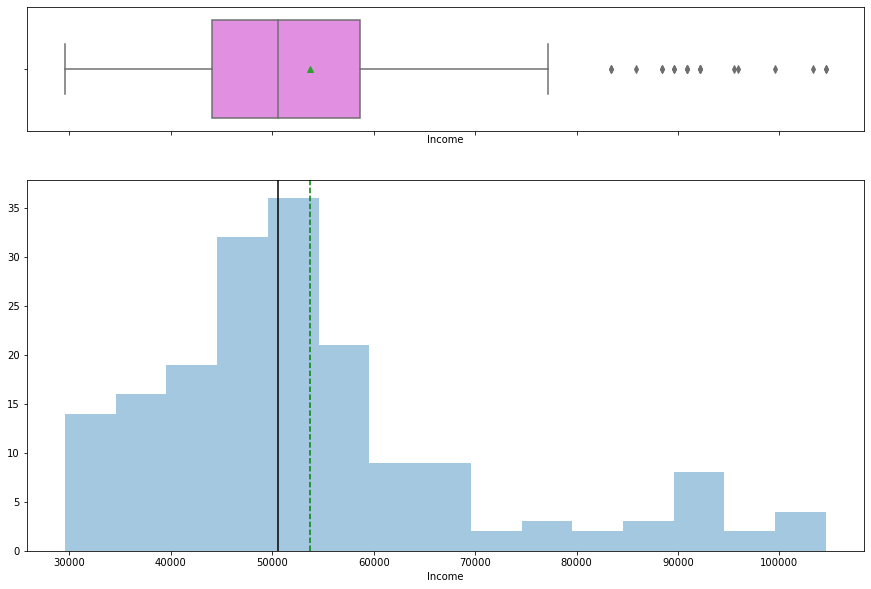

In [14]:
histogram_boxplot(dfcard['Income'])
print("Q3:",dfcard['Income'].quantile(0.75))

#### Observation:
* Income is right skewed and has many outliers towards higher end.
* Mean income is 53719.


### Observations on Miles

Mean: 103.19444444444444 
Median: 94.0
Q3: 114.75


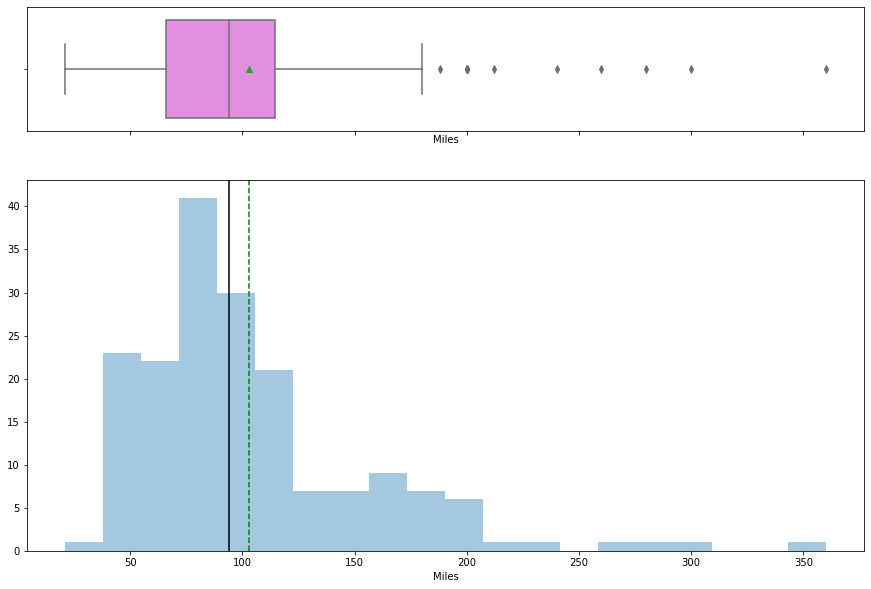

In [15]:
histogram_boxplot(dfcard['Miles'])
print("Q3:",dfcard['Miles'].quantile(0.75))

#### Observation:
* Mean of the mile is 103 and showing that most of the customer are running 100miles per week on treadmill.
* Miles is right skewed and have outliers on higher side of Miles. Some customer are running 200 miles per week and some 350.They may be the professional runner.


### Bar plot to see the percentage distribution of each feature

In [16]:
def bar_prc(plot,feature):
    total=len(feature)
    for p in ax.patches:
        percentage='{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage,(x,y),size=12)
    plt.show()
        

### Observations on Product

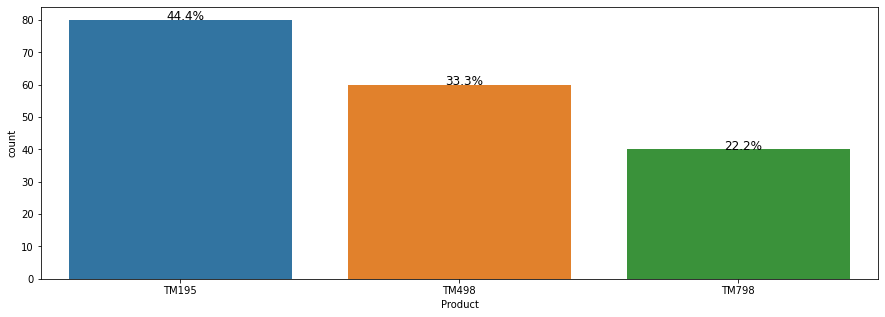

In [17]:
plt.figure(figsize=(15,5))
ax=sns.countplot(dfcard['Product'])
bar_prc(ax,dfcard['Product'])

* TM195 is highest selling product.

### Observations on Gender

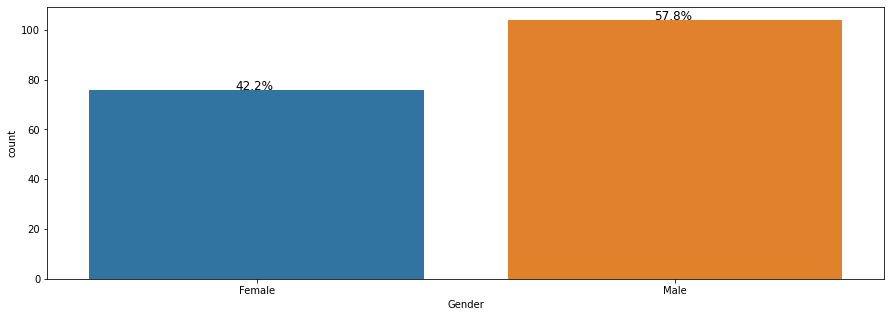

In [18]:
plt.figure(figsize=(15,5))
ax=sns.countplot(dfcard['Gender'])
bar_prc(ax,dfcard['Gender'])

* Male user are more than female.

### Observations on Education

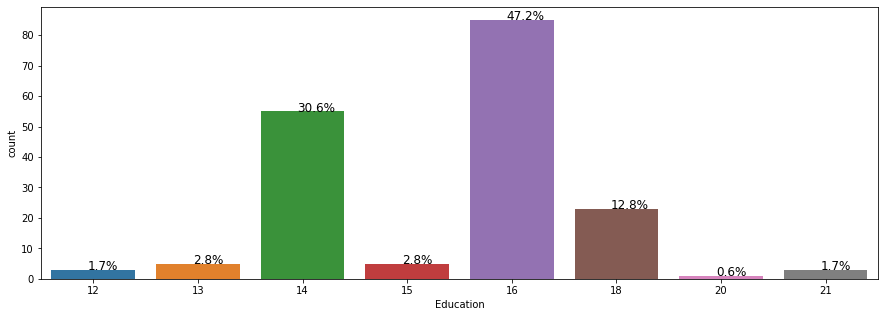

In [19]:
plt.figure(figsize=(15,5))
ax=sns.countplot(dfcard['Education'])
bar_prc(ax,dfcard['Education'])

* 47.6% of total cutsomer have 16 years of education and 30.6% have14 years.

### Observations on Marital Status 

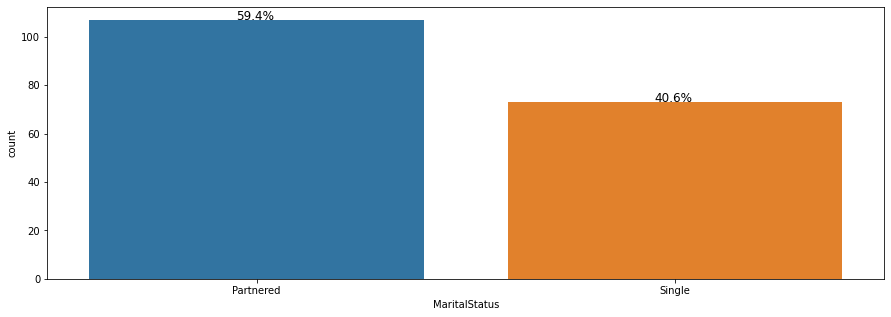

In [20]:
plt.figure(figsize=(15,5))
ax=sns.countplot(dfcard['MaritalStatus'])
bar_prc(ax,dfcard['MaritalStatus'])

* 59.4 % customer have partner while 40.6% are single

### Observations on Usage

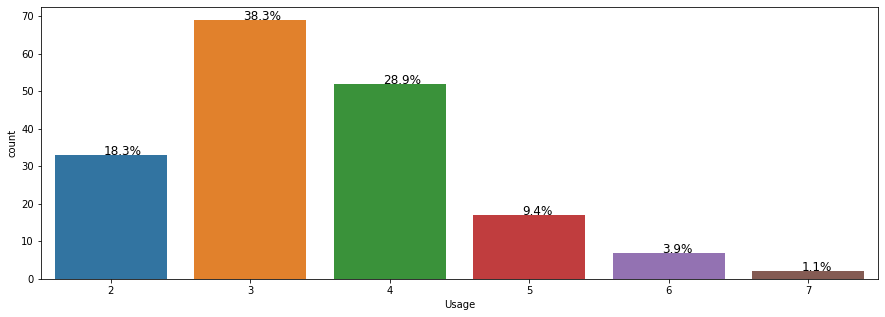

In [21]:
plt.figure(figsize=(15,5))
ax=sns.countplot(dfcard['Usage'])
bar_prc(ax,dfcard['Usage'])

##### Observation:
* 38.3% customer wants to use treadmill 3 times in a week while 28.9 % wants to use 4 times in a week.
* Only 1.1% customer wants to use treadmill 7days in a week. These customer could be professional player.

### Observations on Fitness

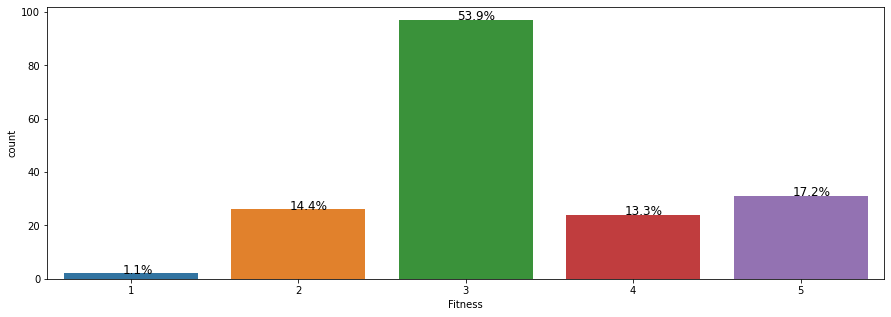

In [22]:
plt.figure(figsize=(15,5))
ax=sns.countplot(dfcard['Fitness'])
bar_prc(ax,dfcard['Fitness'])

##### Observation:
* 53.9 % customer are getting average score 3 for fitness. While 14.4% are getting2 and 13.3% got4.
* A fitness campaign should be run targeting average fitness scoring customer to improve the score.  


## Bivariate Analysis

#### Correlation and heat Map

In [23]:
dfcard.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


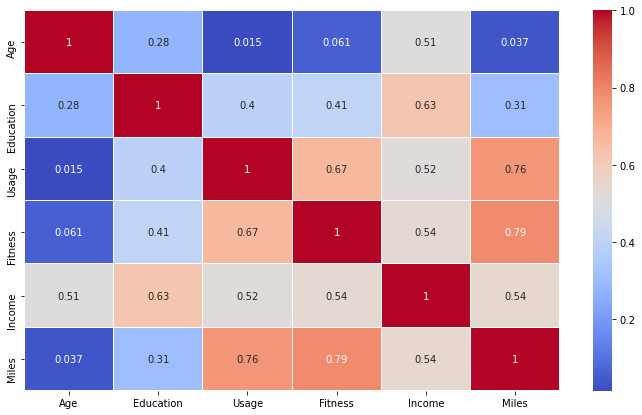

In [24]:
plt.figure(figsize=(12,7))
sns.heatmap(dfcard.corr(),linewidths=0.05,annot=True,cmap='coolwarm')
plt.show()

#### pairplot

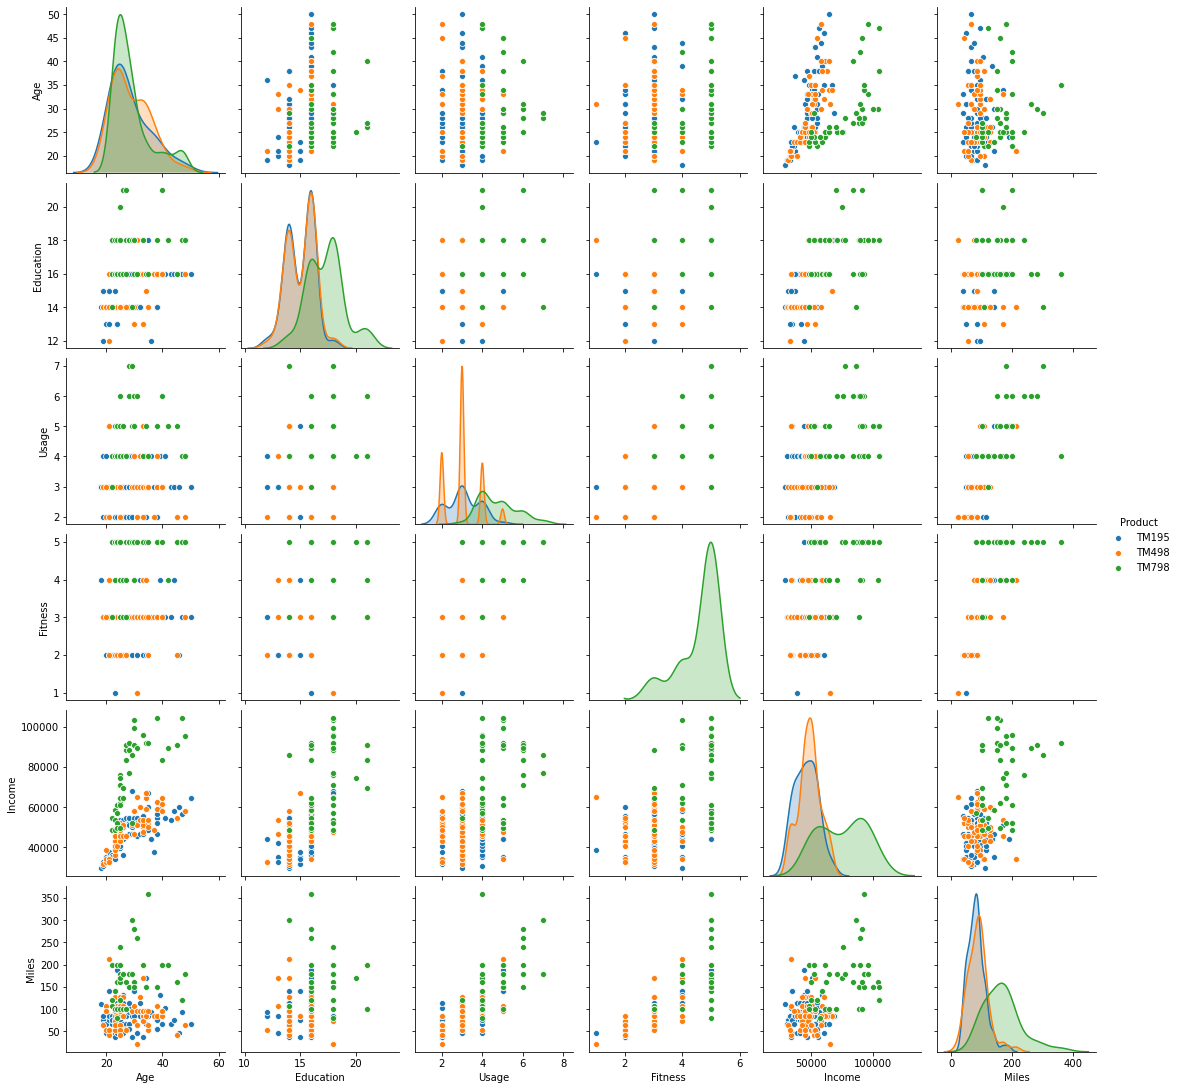

In [26]:
sns.pairplot(dfcard,hue='Product')
plt.show()

### Product vs Age


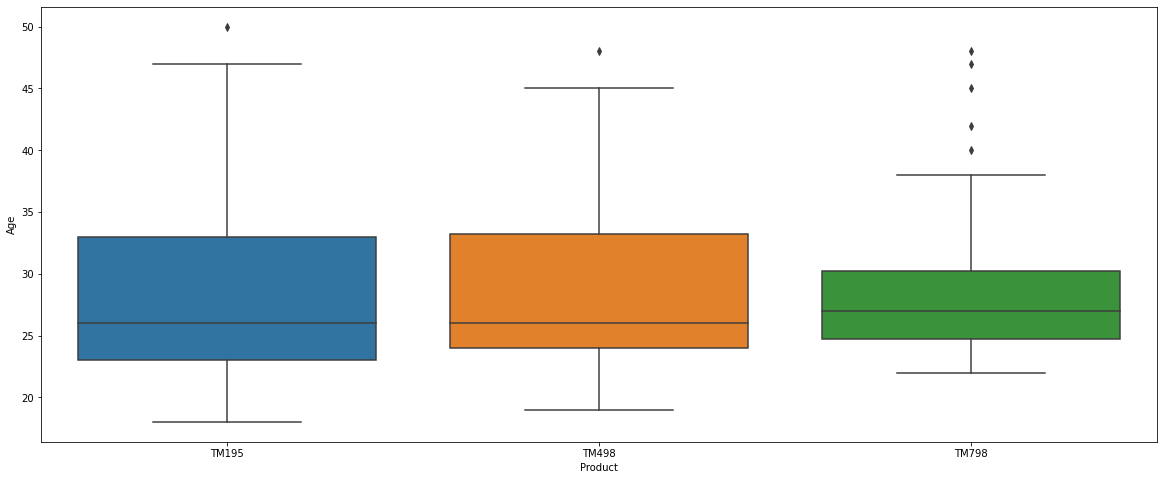

In [25]:
plt.figure(figsize=(20,8))
sns.boxplot(dfcard['Product'],dfcard['Age'])
plt.show()

#### Observation:
* TM195and TM498 are preferred by al age group.
* The age group of TM798 fall above 22 and below 37 with some outliers.

### Product vs Education

In [26]:
pd.crosstab(dfcard['Product'],dfcard['Education'])

Education,12,13,14,15,16,18,20,21
Product,,,,,,,,
TM195,2,3,30,4,39,2,0,0
TM498,1,2,23,1,31,2,0,0
TM798,0,0,2,0,15,19,1,3


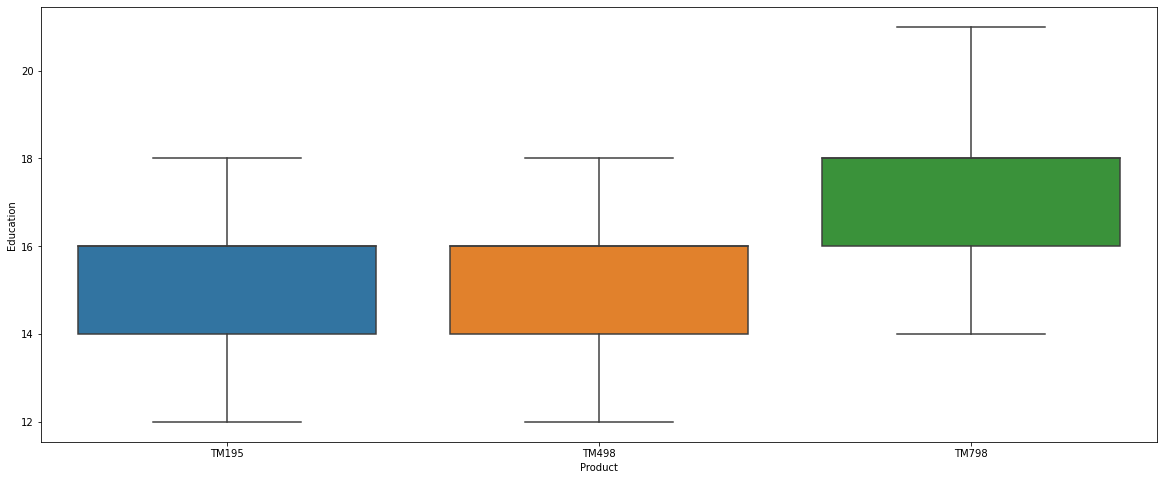

In [27]:
plt.figure(figsize=(20,8))
sns.boxplot(dfcard['Product'],dfcard['Education'])
plt.show()

### Product vs Usage

In [28]:
pd.crosstab(dfcard['Product'],dfcard['Usage'])

Usage,2,3,4,5,6,7
Product,,,,,,
TM195,19,37,22,2,0,0
TM498,14,31,12,3,0,0
TM798,0,1,18,12,7,2


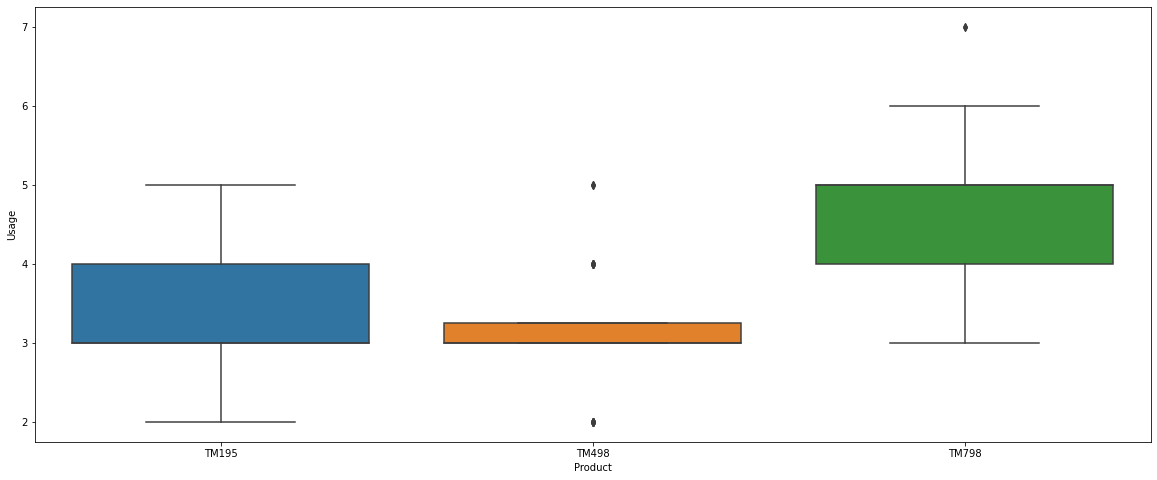

In [29]:
plt.figure(figsize=(20,8))
sns.boxplot(dfcard['Product'],dfcard['Usage'])
plt.show()

#### Observation:
* TM195 treadmills is popular among the customer who wants to use the treadmill for more than 3 days in a week.
* Customer with less than 3 days usage in a week prefer TM498.
* TM798 mostly used by customer who use treadmills more than 3 days is week.


### Product vs Income

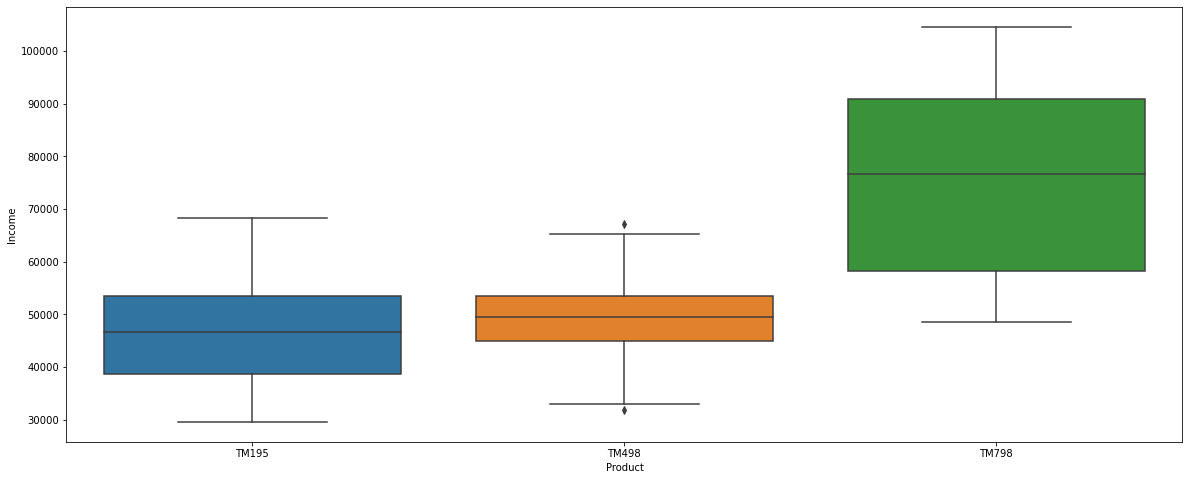

In [30]:
plt.figure(figsize=(20,8))
sns.boxplot(dfcard['Product'],dfcard['Income'])
plt.show()

* Higher income class customers prefer to use TM798 whereas middle range prefer TM195 & TM498.

### Product vs Miles

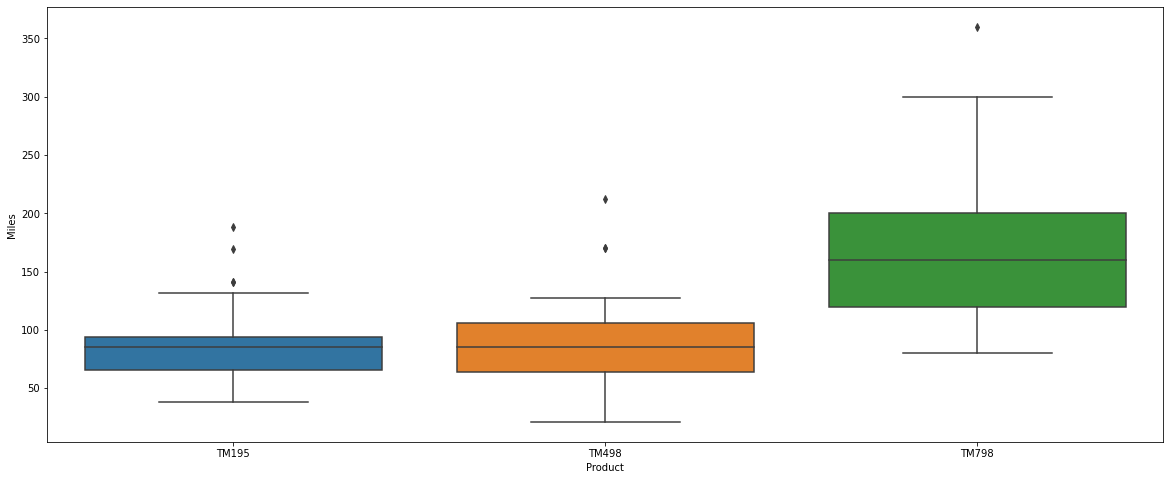

In [31]:
plt.figure(figsize=(20,8))
sns.boxplot(dfcard['Product'],dfcard['Miles'])
plt.show()

* Customer with higher miles on treadmill prefer to use TM798.

### Product vs Gender

In [34]:
pd.crosstab(dfcard['Product'],dfcard['Gender'])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


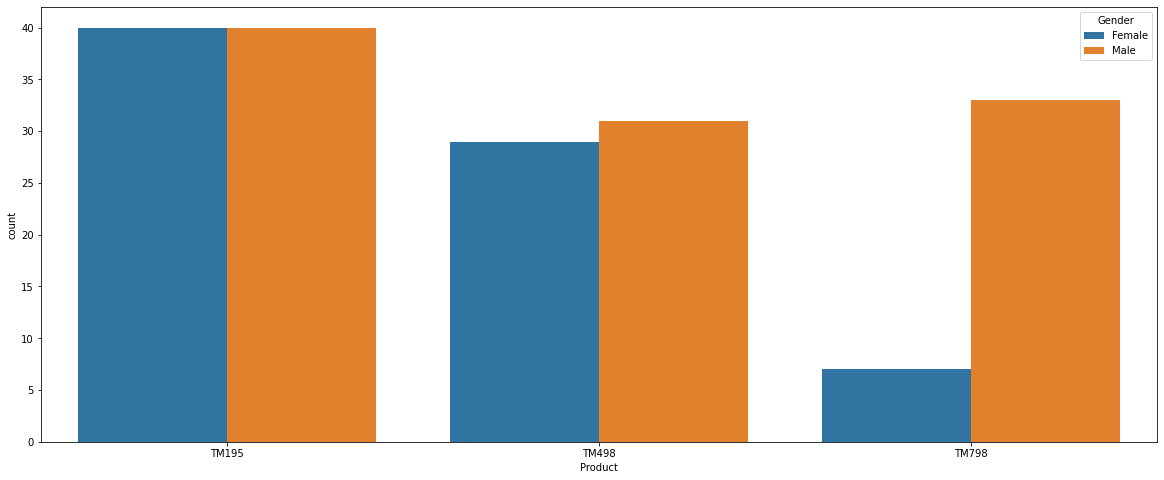

In [33]:
plt.figure(figsize=(20,8))
sns.countplot(dfcard['Product'],hue=dfcard['Gender'])
plt.show()

* TM798 is mostly bought by the male customer than female.
* The number of male and female buyer for TM195 is same however male is slightly more for TM498.


### Product vs Fitness

In [37]:
pd.crosstab(dfcard['Product'],dfcard['Fitness'])

Fitness,1,2,3,4,5
Product,,,,,
TM195,1,14,54,9,2
TM498,1,12,39,8,0
TM798,0,0,4,7,29


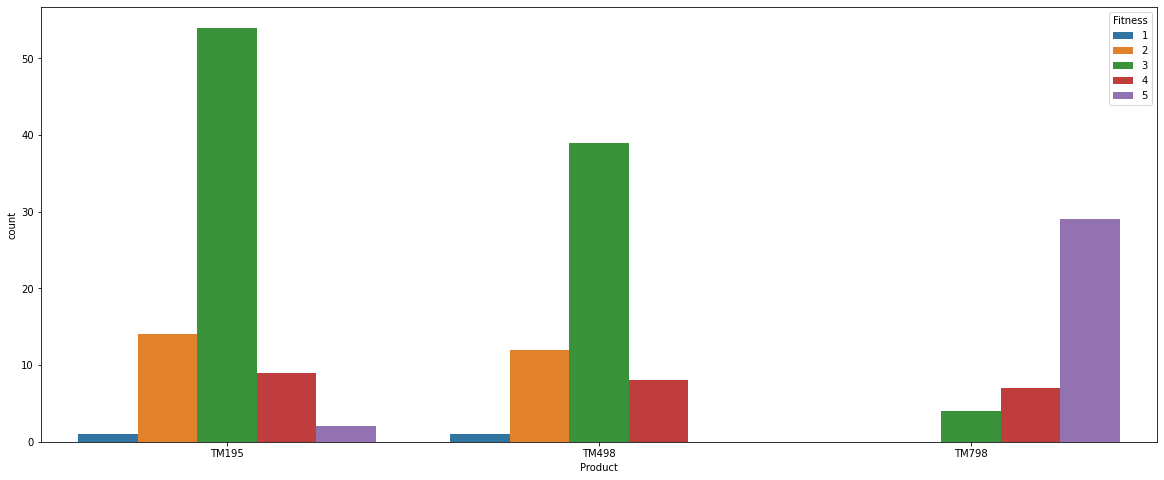

In [36]:
plt.figure(figsize=(20,8))
sns.countplot(dfcard['Product'],hue=dfcard['Fitness'])
plt.show()

* TM195 and TM498 user are getting average score 3 while TM798 treadmill user are getting best fitness score.

### Product vs Marital Status

In [39]:
pd.crosstab(dfcard['Product'],dfcard['MaritalStatus'])

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


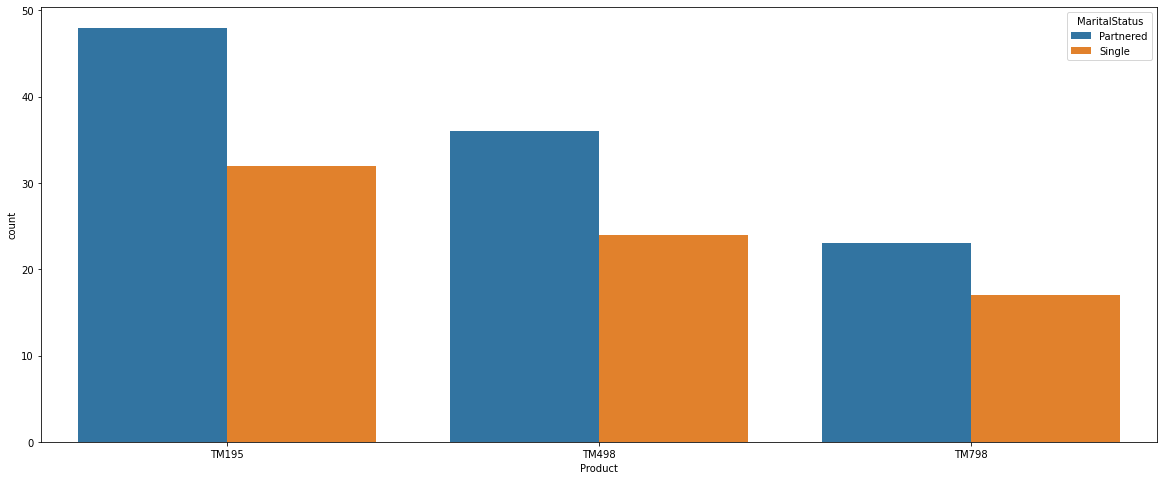

In [38]:
plt.figure(figsize=(20,8))
sns.countplot(dfcard['Product'],hue=dfcard['MaritalStatus'])
plt.show()

* For all three segment the number of partnered users is more than the single user.
* Customer with partner have higher probability to buy treadmill than single status.

<a id = "link6"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.6 Customer profiling

#### TM195 Customer

In [55]:
dfcard_TM195=dfcard[dfcard['Product']=="TM195"]

In [58]:
dfcard_TM195.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,80,1,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,80,NaN,NaN,NaN,28.55,7.22145,18,23,26,33,50
Gender,80,2,Male,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,80,NaN,NaN,NaN,15.0375,1.21638,12,14,16,16,18
MaritalStatus,80,2,Partnered,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,80,NaN,NaN,NaN,3.0875,0.782624,2,3,3,4,5
Fitness,80,NaN,NaN,NaN,2.9625,0.66454,1,3,3,3,5
Income,80,NaN,NaN,NaN,46418,9075.78,29562,38658,46617,53439,68220
Miles,80,NaN,NaN,NaN,82.7875,28.8741,38,66,85,94,188


#### observation for TM195
- There is total 80 user for TM195 and is the on the top among three treadmills.
- Customer are in their early 20’s to 30’s.
- Customers are using 3 days in a week.
- Average fitness score is 3.
- Customer income range is between 40K to 50K.
- Average mile is 83.


#### TM498 Customer

In [59]:
dfcard_TM498=dfcard[dfcard['Product']=="TM498"]

In [61]:
dfcard_TM498.shape

(60, 9)

In [62]:
dfcard_TM498.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,60,1,TM498,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,60,NaN,NaN,NaN,28.9,6.64525,19,24,26,33.25,48
Gender,60,2,Male,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,60,NaN,NaN,NaN,15.1167,1.22255,12,14,16,16,18
MaritalStatus,60,2,Partnered,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,60,NaN,NaN,NaN,3.06667,0.799717,2,3,3,3.25,5
Fitness,60,NaN,NaN,NaN,2.9,0.62977,1,3,3,3,4
Income,60,NaN,NaN,NaN,48973.7,8653.99,31836,44911.5,49459.5,53439,67083
Miles,60,NaN,NaN,NaN,87.9333,33.2631,21,64,85,106,212


#### observation for TM498
- There is total 60 user for TM498.
- Customer are in their early 20’s to 30’s.
- Customers are using 3 days in a week.
- Average fitness score is 3.
- Customer income range is around 50K.
- Average mile is 87.


#### TM798 Customer

In [54]:
dfcard_TM798=dfcard[dfcard['Product']=='TM798']

In [63]:
dfcard_TM798.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,40,1,TM798,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,40,NaN,NaN,NaN,29.1,6.97174,22,24.75,27,30.25,48
Gender,40,2,Male,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,40,NaN,NaN,NaN,17.325,1.63907,14,16,18,18,21
MaritalStatus,40,2,Partnered,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,40,NaN,NaN,NaN,4.775,0.946993,3,4,5,5,7
Fitness,40,NaN,NaN,NaN,4.625,0.667467,3,4,5,5,5
Income,40,NaN,NaN,NaN,75441.6,18505.8,48556,58204.8,76568.5,90886,104581
Miles,40,NaN,NaN,NaN,166.9,60.0665,80,120,160,200,360


#### observation for TM798
- There is total 40 user for TM798.
- Customer are in their late 20’s and highly educated.
- Higher earner.
- Customers are using on average 5 days in a week and making 160 miles per week.
- Average fitness score is 5.


<a id = "link7"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.7 Customer segmentation

### Gender vs Income

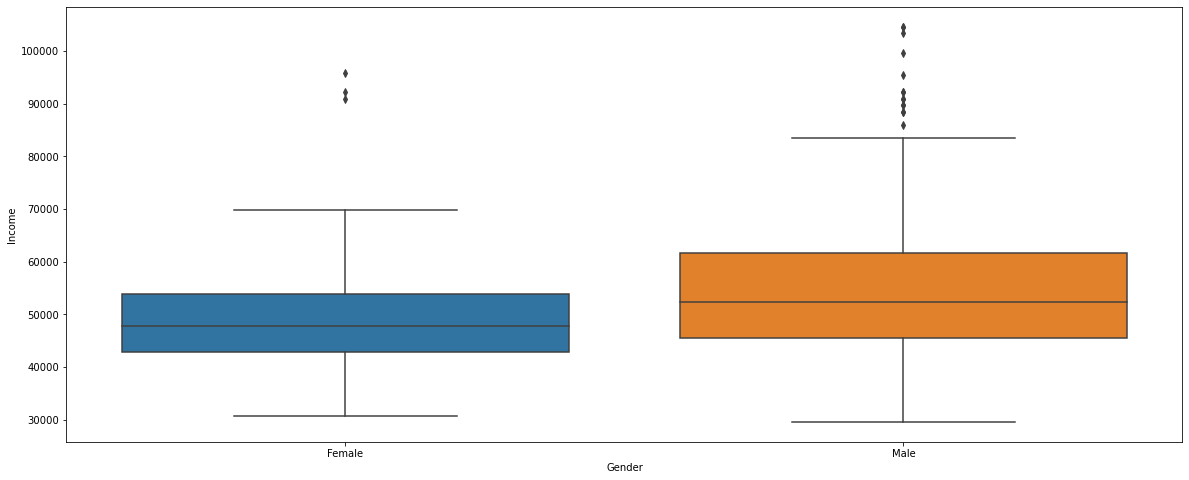

In [64]:
plt.figure(figsize=(20,8))
sns.boxplot(dfcard['Gender'],dfcard['Income'])
plt.show()

- Male are earning more than female.
- Outliers present o both the gender showing the large disparity on the income for male and female.


### Gender vs Usage vs Marital Status

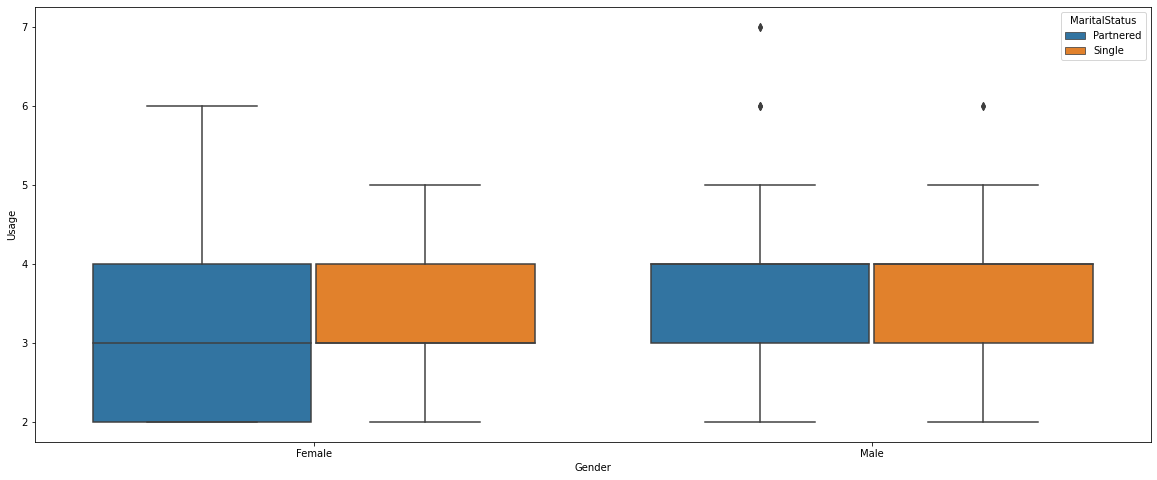

In [74]:
plt.figure(figsize=(20,8))
sns.boxplot(dfcard['Gender'],dfcard['Usage'],hue=dfcard['MaritalStatus'])
plt.show()

- Usage for single female and single male or partnered male are same.
- Usage for female with partner varies.


### Gender vs Income vs Marital Status

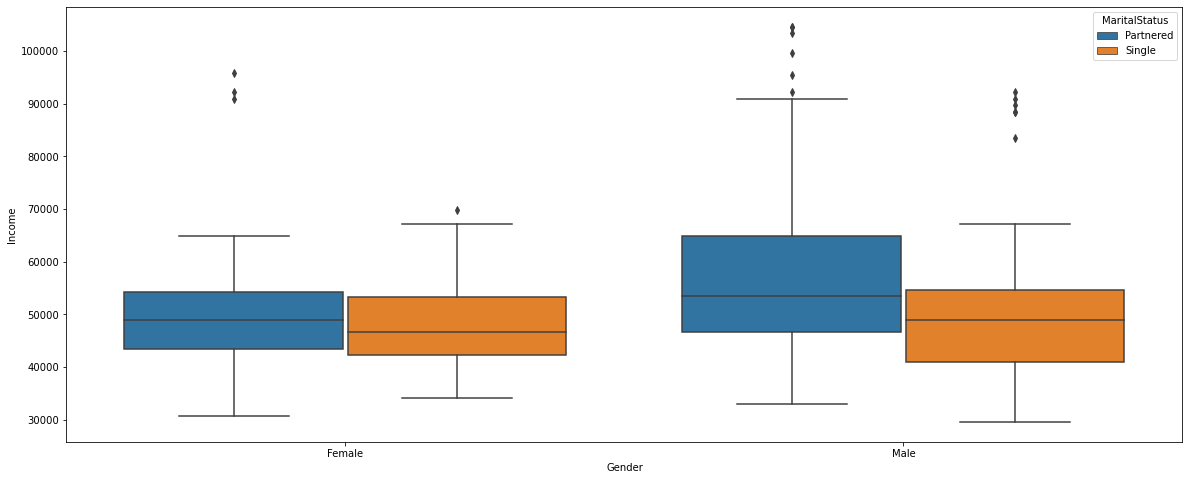

In [75]:
plt.figure(figsize=(20,8))
sns.boxplot(dfcard['Gender'],dfcard['Income'],hue=dfcard['MaritalStatus'])
plt.show()

- Male with partner have higher income.
- Income for single female or with partner is almost same.

### Gender vs Miles

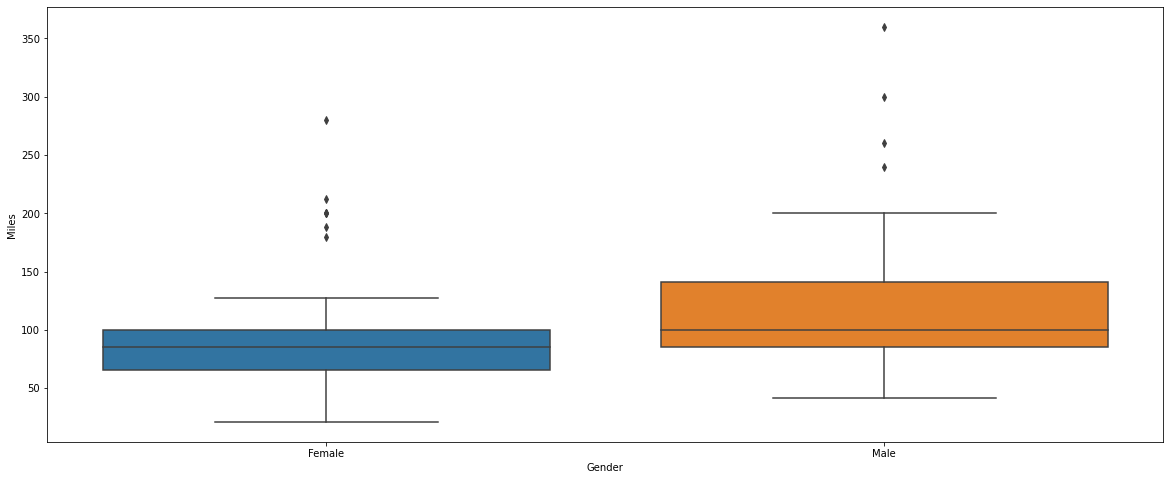

In [76]:
plt.figure(figsize=(20,8))
sns.boxplot(dfcard['Gender'],dfcard['Miles'])
plt.show()

- Males are running more miles than female


### Gender vs Miles vs Marital Status

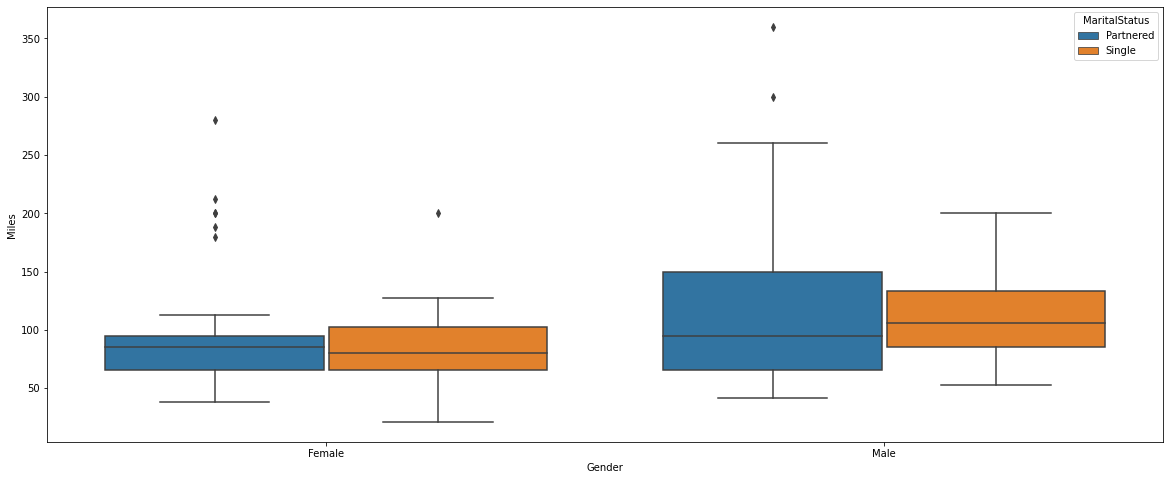

In [78]:
plt.figure(figsize=(20,8))
sns.boxplot(dfcard['Gender'],dfcard['Miles'],hue=dfcard['MaritalStatus'])
plt.show()

- Male with partner running more than female with partner

### Gender vs Miles vs Education

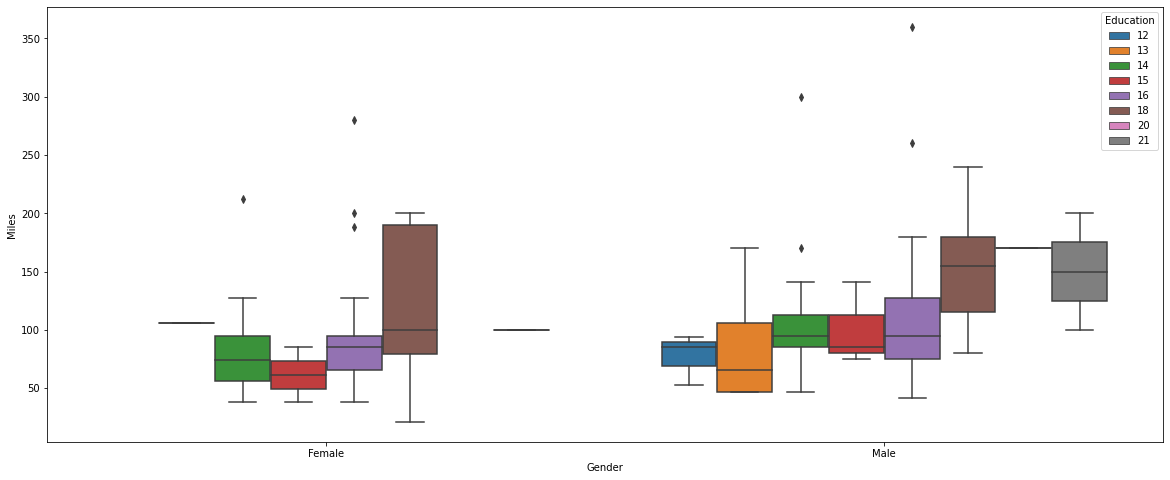

In [79]:
plt.figure(figsize=(20,8))
sns.boxplot(dfcard['Gender'],dfcard['Miles'],hue=dfcard['Education'])
plt.show()

- Miles is increasing with the increase of education,
- Fitness awareness looks like improving with the increase of education


### Age vs Miles vs Gender

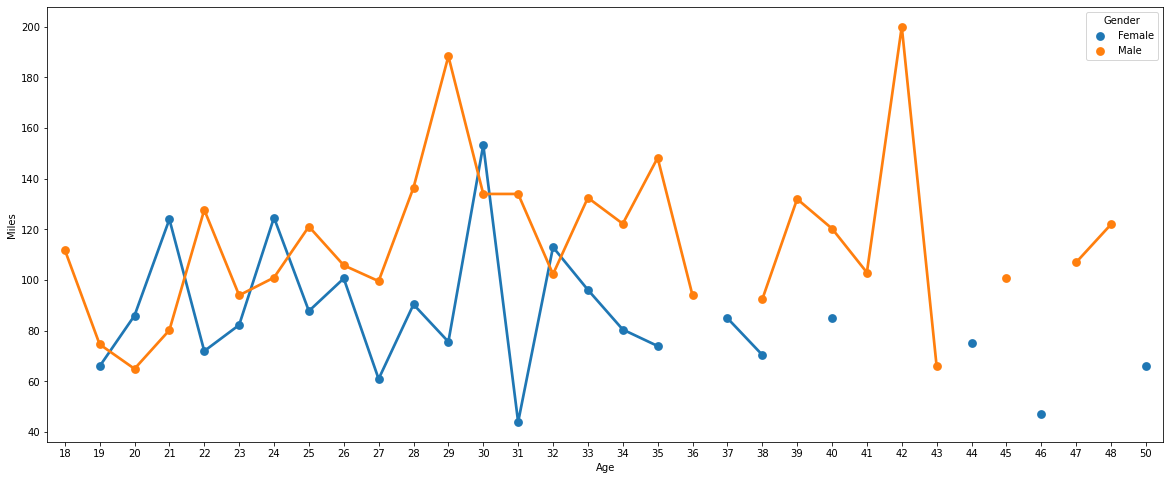

In [88]:
plt.figure(figsize=(20,8))
sns.pointplot(dfcard['Age'],dfcard['Miles'],hue=dfcard['Gender'],ci=0)
plt.show()

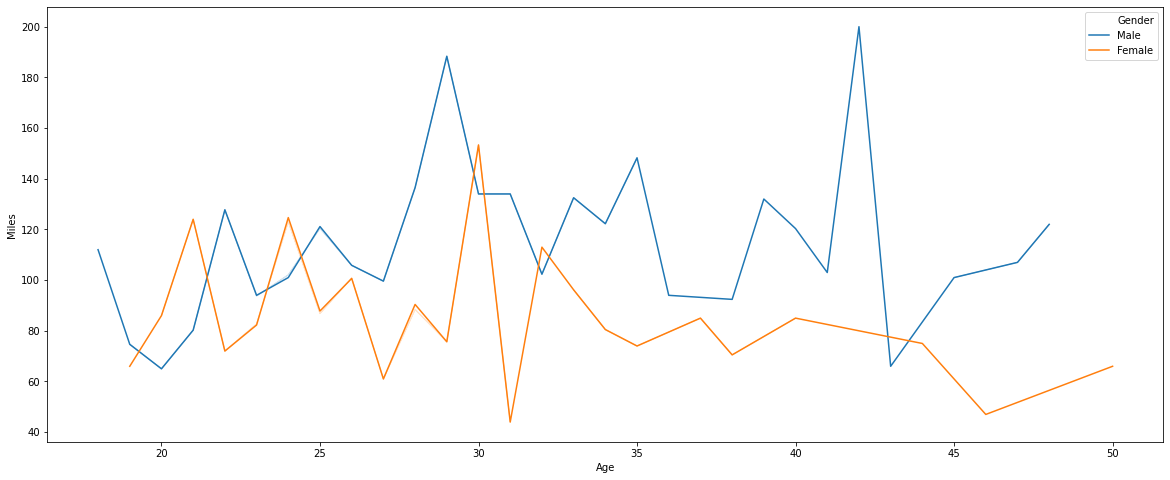

In [89]:
plt.figure(figsize=(20,8))
sns.lineplot(dfcard['Age'],dfcard['Miles'],hue=dfcard['Gender'],ci=0)
plt.show()

- Miles decreases with increase of age for female while for male its first decreasing  and then increasing.
- Number of miles showing drastic decline in females after age 30.



### Age vs Income vs Product

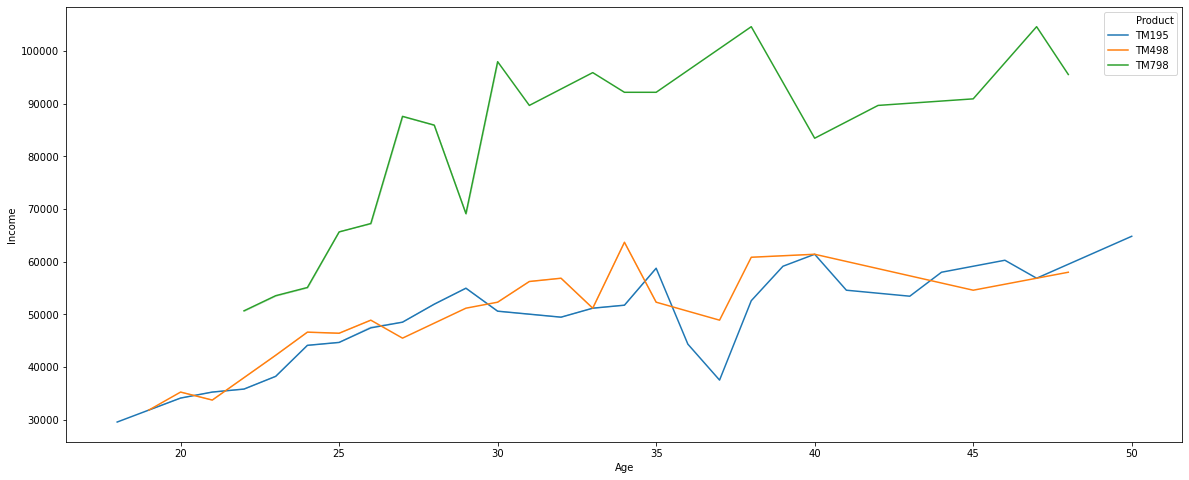

In [90]:
plt.figure(figsize=(20,8))
sns.lineplot(dfcard['Age'],dfcard['Income'],hue=dfcard['Product'],ci=0)
plt.show()

- Income group for TM195 and TM498 is very similar.
- TM798 customer have higher income.

###  Income vs Miles vs Product

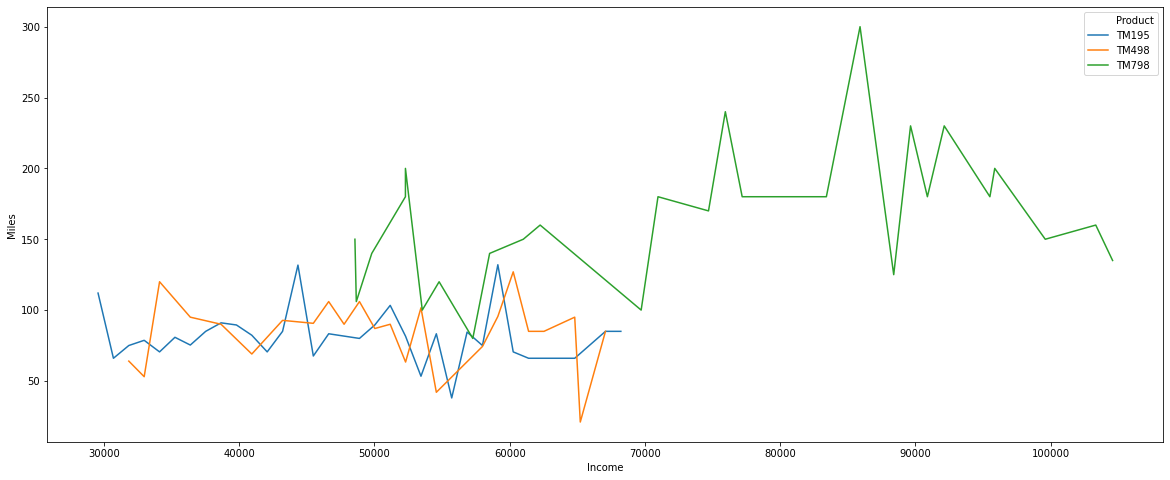

In [91]:
plt.figure(figsize=(20,8))
sns.lineplot(dfcard['Income'],dfcard['Miles'],hue=dfcard['Product'],ci=None)
plt.show()

- TM195 and TM498 belongs to very similar income group and running approximately same miles per week.
- Higher Income group customer mainly buys TM798 and they are the one who makes more miles per week.


<a id = "link8"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.8 Conclusion and Business Recommendations

## Conclusion

### Key Observations
#### observation for TM195
- Used by most average income customer hinting the price of TM195 is affordable.
- used 3 days in a week showing that this could be beginner level treadmill.
- The average fitness rating is 3 indicating the treadmill is not frequently used.

#### observation for TM498
- The income group for this treadmill is slightly higher than TM195 hinting this is also affordable with little more expensive than TM195.
- The average mile by TM498 is slightly higher than TM195 which may indicate transition from beginner to mid-level.
- The average fitness rating is 3 indicating this treadmill is also not frequently used.

#### observation for TM798
- The income group for this treadmill is higher indicating that TM798 is expensive.
- The fitness score by TM798 customer is very high showing that they are very serious about fitness.
- TM798 may have plenty of features that might be attracting customer to use an average 5 days in a week.
- TM798 customer are highly educated and is famous among the male compared to the female.


### Business Recommendations:
- TM195 is most sold treadmill followed by TM498.These two treadmills is important for company revenue.
- The average fitness score by TM195 & TM498 is 3 which may not align with the company fitness vision. Company should add some additive feature to these two treadmills to encourage the entry level customer.
- To increase further revenue company should target additional sell of TM195 to the female above 30 years old as they want to use 2 to 3 days in a week.
- Partnered are earning more than single and therefore they can afford TM798.Compnay run some promotion to sell more TM798 to partnered.
